In [1]:
import numpy as np

import wf_psf as wf

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns



In [2]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

saving_folder ='../figures/'

define_plot_style()
sns.set(font_scale=1.5)


In [3]:
metrics_file = '../wf-outputs/metrics/more_stars_bis/metrics-poly_more_%s_%s_bis_%s.npy'


In [4]:
def robust_metrics_dict_list(metrics_file, dataset_list, n_realisations, extract_fun):
    metrics_dict_list = []
    for idx in range(1, n_realisations+1):
        for dataset in dataset_list:
            try:
                metric_loaded = [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()]]
                metrics_dict_list.append(extract_fun(metric_loaded))
                
            except:
                continue
            
    return metrics_dict_list
                

# wf.script_utils.extract_shape_pix_results ->
#     model_polyc_shpix_rmse = res[0]
#     model_polyc_shpix_std_rmse = res[1]
#     model_polyc_shpix_rel_rmse = res[2]
#     model_polyc_shpix_std_rel_rmse = res[3]

 

In [5]:
# Extract full datasets
n_realisations = 5

dataset_list = [
    ('stars', '1k'),
    ('stars', '2k'),
    ('stars', '4k'),
    ('stars', '6k'),
]
metrics_dict_list = []
pix_metrics_dict_list = []
opd_metrics_dict_list = []
for idx in range(1, n_realisations+1):   
    metrics_dict_list_ = wf.script_utils.extract_shape_pix_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    pix_metrics_dict_list_ = wf.script_utils.extract_poly_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    opd_metrics_dict_list_ = wf.script_utils.extract_opd_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    metrics_dict_list.append(metrics_dict_list_)
    pix_metrics_dict_list.append(pix_metrics_dict_list_)
    opd_metrics_dict_list.append(opd_metrics_dict_list_)
    
metrics_dict_list_np = np.array(metrics_dict_list)
pix_metrics_dict_list_np = np.array(pix_metrics_dict_list)
opd_metrics_dict_list_np = np.array(opd_metrics_dict_list)


dataset_8k_list = [
    ('stars', '8k'),
]
metrics_8k_dict_list = robust_metrics_dict_list(metrics_file, dataset_8k_list, n_realisations, wf.script_utils.extract_shape_pix_results)
metrics_8k_dict_list_np = np.array(metrics_8k_dict_list)
pix_metrics_8k_dict_list = robust_metrics_dict_list(metrics_file, dataset_8k_list, n_realisations, wf.script_utils.extract_poly_results)
pix_metrics_8k_dict_list_np = np.array(pix_metrics_8k_dict_list)
opd_metrics_8k_dict_list = robust_metrics_dict_list(metrics_file, dataset_8k_list, n_realisations, wf.script_utils.extract_opd_results)
opd_metrics_8k_dict_list_np = np.array(opd_metrics_8k_dict_list)

dataset_list = [
    ('stars_complex_model', '1k'),
    ('stars_complex_model', '2k'),
    ('stars_complex_model', '4k'),
    ('stars_complex_model', '6k'),
]
metrics_complex_dict_list = []
pix_metrics_complex_dict_list = []
opd_metrics_complex_dict_list = []
for idx in range(1, n_realisations+1):
    metrics_complex_dict_list_ = wf.script_utils.extract_shape_pix_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    pix_metrics_complex_dict_list_ = wf.script_utils.extract_poly_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    opd_metrics_complex_dict_list_ = wf.script_utils.extract_opd_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    metrics_complex_dict_list.append(metrics_complex_dict_list_)
    pix_metrics_complex_dict_list.append(pix_metrics_complex_dict_list_)
    opd_metrics_complex_dict_list.append(opd_metrics_complex_dict_list_)
    
metrics_complex_dict_list_np = np.array(metrics_complex_dict_list)
pix_metrics_complex_dict_list_np = np.array(pix_metrics_complex_dict_list)
opd_metrics_complex_dict_list_np = np.array(opd_metrics_complex_dict_list)



dataset_complex_8k_list = [
    ('stars_complex_model', '8k'),
]
metrics_complex_8k_dict_list = robust_metrics_dict_list(metrics_file, dataset_complex_8k_list, n_realisations, wf.script_utils.extract_shape_pix_results)
metrics_complex_8k_dict_list_np = np.array(metrics_complex_8k_dict_list)
pix_metrics_complex_8k_dict_list = robust_metrics_dict_list(metrics_file, dataset_complex_8k_list, n_realisations, wf.script_utils.extract_poly_results)
pix_metrics_complex_8k_dict_list_np = np.array(pix_metrics_complex_8k_dict_list)
opd_metrics_complex_8k_dict_list = robust_metrics_dict_list(metrics_file, dataset_complex_8k_list, n_realisations, wf.script_utils.extract_opd_results)
opd_metrics_complex_8k_dict_list_np = np.array(opd_metrics_complex_8k_dict_list)



metrics_mean = np.concatenate((
    np.mean(metrics_dict_list_np,axis=0),
    np.mean(metrics_8k_dict_list_np,axis=0),
    np.mean(metrics_complex_dict_list_np,axis=0),
    np.mean(metrics_complex_8k_dict_list_np,axis=0),
), axis=1)
pix_metrics_mean = np.concatenate((
    np.mean(pix_metrics_dict_list_np,axis=0),
    np.mean(pix_metrics_8k_dict_list_np,axis=0),
    np.mean(pix_metrics_complex_dict_list_np,axis=0),
    np.mean(pix_metrics_complex_8k_dict_list_np,axis=0),
), axis=1)
opd_metrics_mean = np.concatenate((
    np.mean(opd_metrics_dict_list_np,axis=0),
    np.mean(opd_metrics_8k_dict_list_np,axis=0),
    np.mean(opd_metrics_complex_dict_list_np,axis=0),
    np.mean(opd_metrics_complex_8k_dict_list_np,axis=0),
), axis=1)

metrics_median = np.concatenate((
    np.median(metrics_dict_list_np,axis=0),
    np.median(metrics_8k_dict_list_np,axis=0),
    np.median(metrics_complex_dict_list_np,axis=0),
    np.median(metrics_complex_8k_dict_list_np,axis=0),
), axis=1)
pix_metrics_median = np.concatenate((
    np.median(pix_metrics_dict_list_np,axis=0),
    np.median(pix_metrics_8k_dict_list_np,axis=0),
    np.median(pix_metrics_complex_dict_list_np,axis=0),
    np.median(pix_metrics_complex_8k_dict_list_np,axis=0),
), axis=1)
opd_metrics_median = np.concatenate((
    np.median(opd_metrics_dict_list_np,axis=0),
    np.median(opd_metrics_8k_dict_list_np,axis=0),
    np.median(opd_metrics_complex_dict_list_np,axis=0),
    np.median(opd_metrics_complex_8k_dict_list_np,axis=0),
), axis=1)

metrics_std = np.concatenate((
    np.std(metrics_dict_list_np,axis=0),
    np.std(metrics_8k_dict_list_np,axis=0),
    np.std(metrics_complex_dict_list_np,axis=0),
    np.std(metrics_complex_8k_dict_list_np,axis=0),
), axis=1)
pix_metrics_std = np.concatenate((
    np.std(pix_metrics_dict_list_np,axis=0),
    np.std(pix_metrics_8k_dict_list_np,axis=0),
    np.std(pix_metrics_complex_dict_list_np,axis=0),
    np.std(pix_metrics_complex_8k_dict_list_np,axis=0),
), axis=1)
opd_metrics_std = np.concatenate((
    np.std(opd_metrics_dict_list_np,axis=0),
    np.std(opd_metrics_8k_dict_list_np,axis=0),
    np.std(opd_metrics_complex_dict_list_np,axis=0),
    np.std(opd_metrics_complex_8k_dict_list_np,axis=0),
), axis=1)

metrics_best = np.concatenate((
    np.min(metrics_dict_list_np,axis=0),
    np.min(metrics_8k_dict_list_np,axis=0),
    np.min(metrics_complex_dict_list_np,axis=0),
    np.min(metrics_complex_8k_dict_list_np,axis=0),
), axis=1)
pix_metrics_best = np.concatenate((
    np.min(pix_metrics_dict_list_np,axis=0),
    np.min(pix_metrics_8k_dict_list_np,axis=0),
    np.min(pix_metrics_complex_dict_list_np,axis=0),
    np.min(pix_metrics_complex_8k_dict_list_np,axis=0),
), axis=1)
opd_metrics_best = np.concatenate((
    np.min(opd_metrics_dict_list_np,axis=0),
    np.min(opd_metrics_8k_dict_list_np,axis=0),
    np.min(opd_metrics_complex_dict_list_np,axis=0),
    np.min(opd_metrics_complex_8k_dict_list_np,axis=0),
), axis=1)



In [6]:

print(metrics_mean.shape)
print(metrics_median.shape)
print(metrics_std.shape)
print(metrics_best.shape)

print(pix_metrics_mean.shape)
print(pix_metrics_median.shape)
print(pix_metrics_std.shape)
print(pix_metrics_best.shape)

print(opd_metrics_mean.shape)
print(opd_metrics_median.shape)
print(opd_metrics_std.shape)
print(opd_metrics_best.shape)


(4, 10)
(4, 10)
(4, 10)
(4, 10)
(4, 10)
(4, 10)
(4, 10)
(4, 10)
(4, 10)
(4, 10)
(4, 10)
(4, 10)


In [7]:

print(pix_metrics_dict_list_np[:,2,3])
print(metrics_dict_list_np[:,2,3])
print('')
print(pix_metrics_complex_dict_list_np[:,2,3])
print(metrics_complex_dict_list_np[:,2,3])


[1.64536666 1.55452816 1.5060341  1.63254328 1.66828744]
[5.74986897 3.66121382 3.34920138 4.70314547 4.37947214]

[1.65165402 1.51091805 1.43041695 1.49363419 1.60080828]
[3.8970463  3.45225669 3.72122638 5.53175658 4.20491435]


In [8]:
print('WaveDiff d=5')
print(metrics_median[2,:5])

print('WaveDiff d=10')
print(metrics_median[2,5:])

WaveDiff d=5
[4.74558622 4.38631289 3.68894897 4.37947214 3.48674189]
WaveDiff d=10
[4.90777977 4.5832362  4.04403843 3.8970463  3.79307382]


In [13]:
def gain_m1_wrt_m2(m1,m2):
    return ((m2-m1)/m2)*100.

print('WaveDiff d=5')
print([gain_m1_wrt_m2(_m,metrics_median[2,1]) for _m in metrics_median[2,:5]])

print('WaveDiff d=10')
print([gain_m1_wrt_m2(_m,metrics_median[2,6]) for _m in metrics_median[2,5:]])


WaveDiff d=5
[-8.190782067463372, 0.0, 15.898635847764547, 0.1559567397762896, 20.508591549188118]
WaveDiff d=10
[-7.081100584075582, 0.0, 11.764564358165073, 14.971733388300818, 17.24027192973829]


In [8]:
n_stars = np.array([1e3, 2e3, 4e3, 6e3, 8e3])


# Pixel error @ 3x Euclid resolution

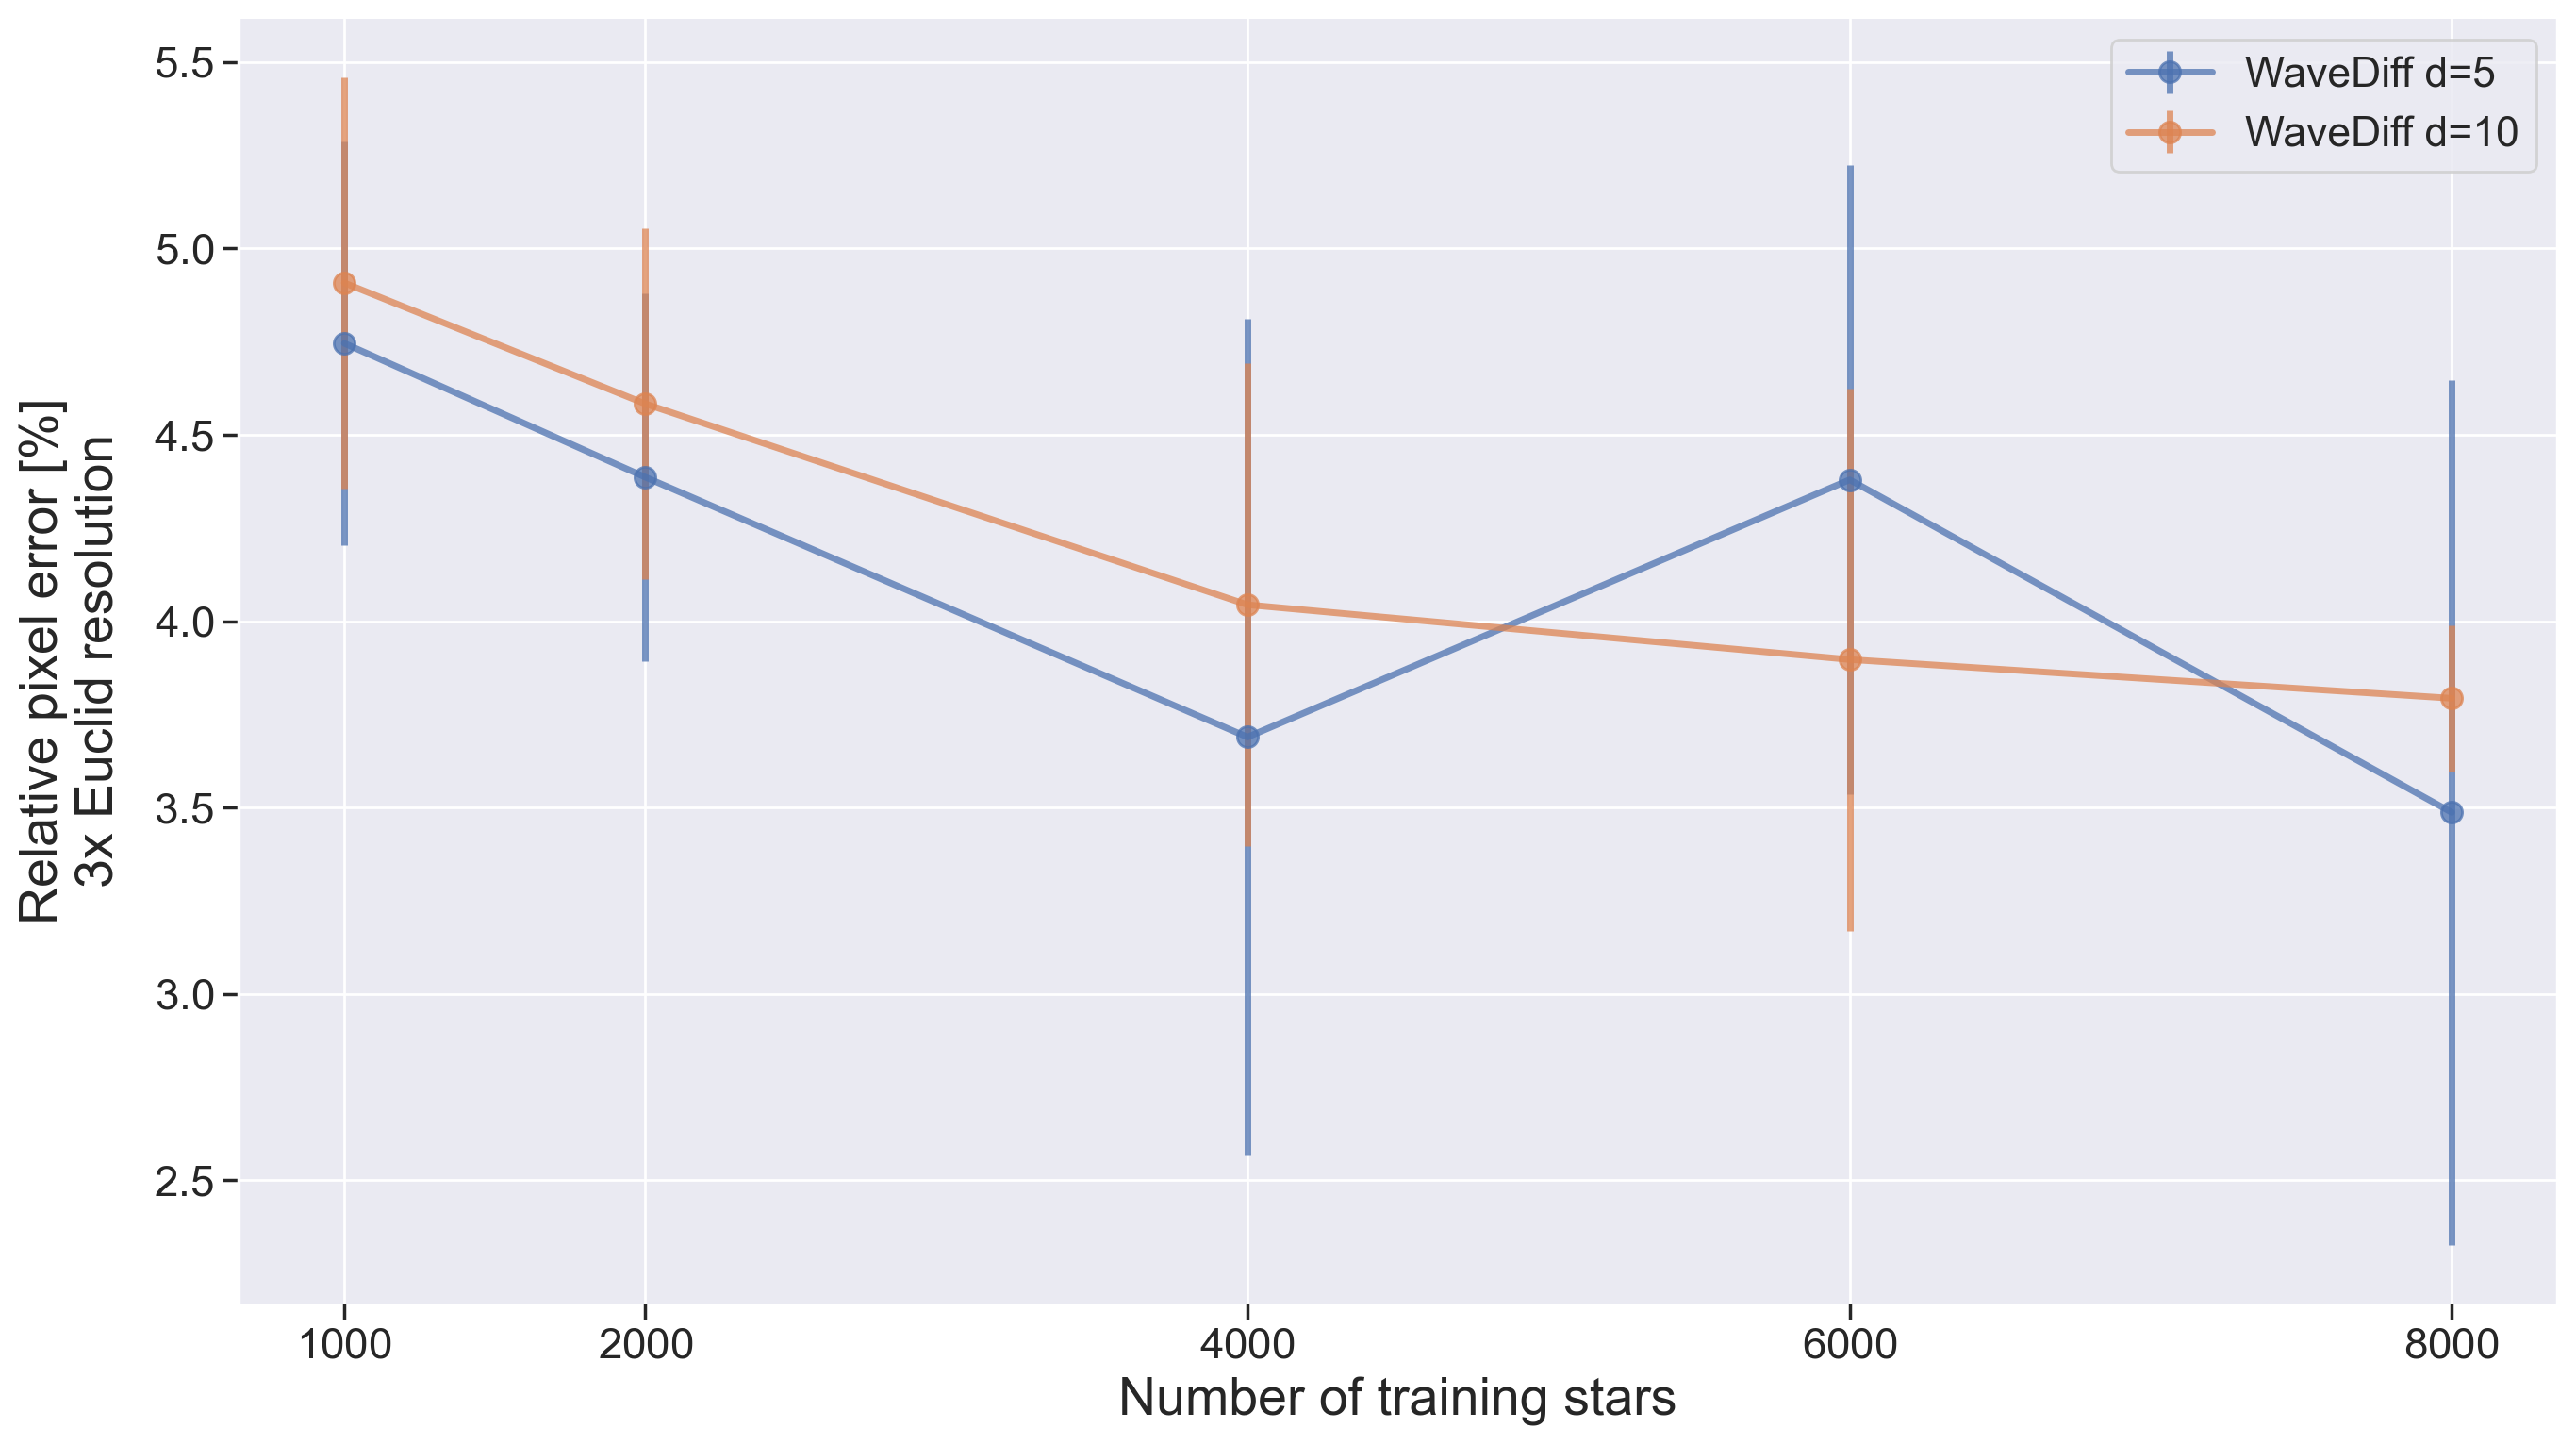

In [160]:

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

# ax1.errorbar(n_stars, metrics_mean[2,:5], metrics_std[2,:5], label='WaveDiff d=5', **kwargs)
# ax1.errorbar(n_stars, metrics_mean[2,5:], metrics_std[2,5:], label='WaveDiff d=10', **kwargs)

ax1.errorbar(n_stars, metrics_median[2,:5], metrics_std[2,:5], label='WaveDiff d=5', **kwargs)
ax1.errorbar(n_stars, metrics_median[2,5:], metrics_std[2,5:], label='WaveDiff d=10', **kwargs)


ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(n_stars)
# plt.xscale('log')

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Relative pixel error [%]\n3x Euclid resolution', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Number of training stars', fontsize = 20)

# plt.savefig(saving_folder + 'pixel_x3res_more_stars_no_best_mean.pdf')
plt.savefig(saving_folder + 'pixel_x3res_more_stars_no_best_median.pdf')
plt.show()


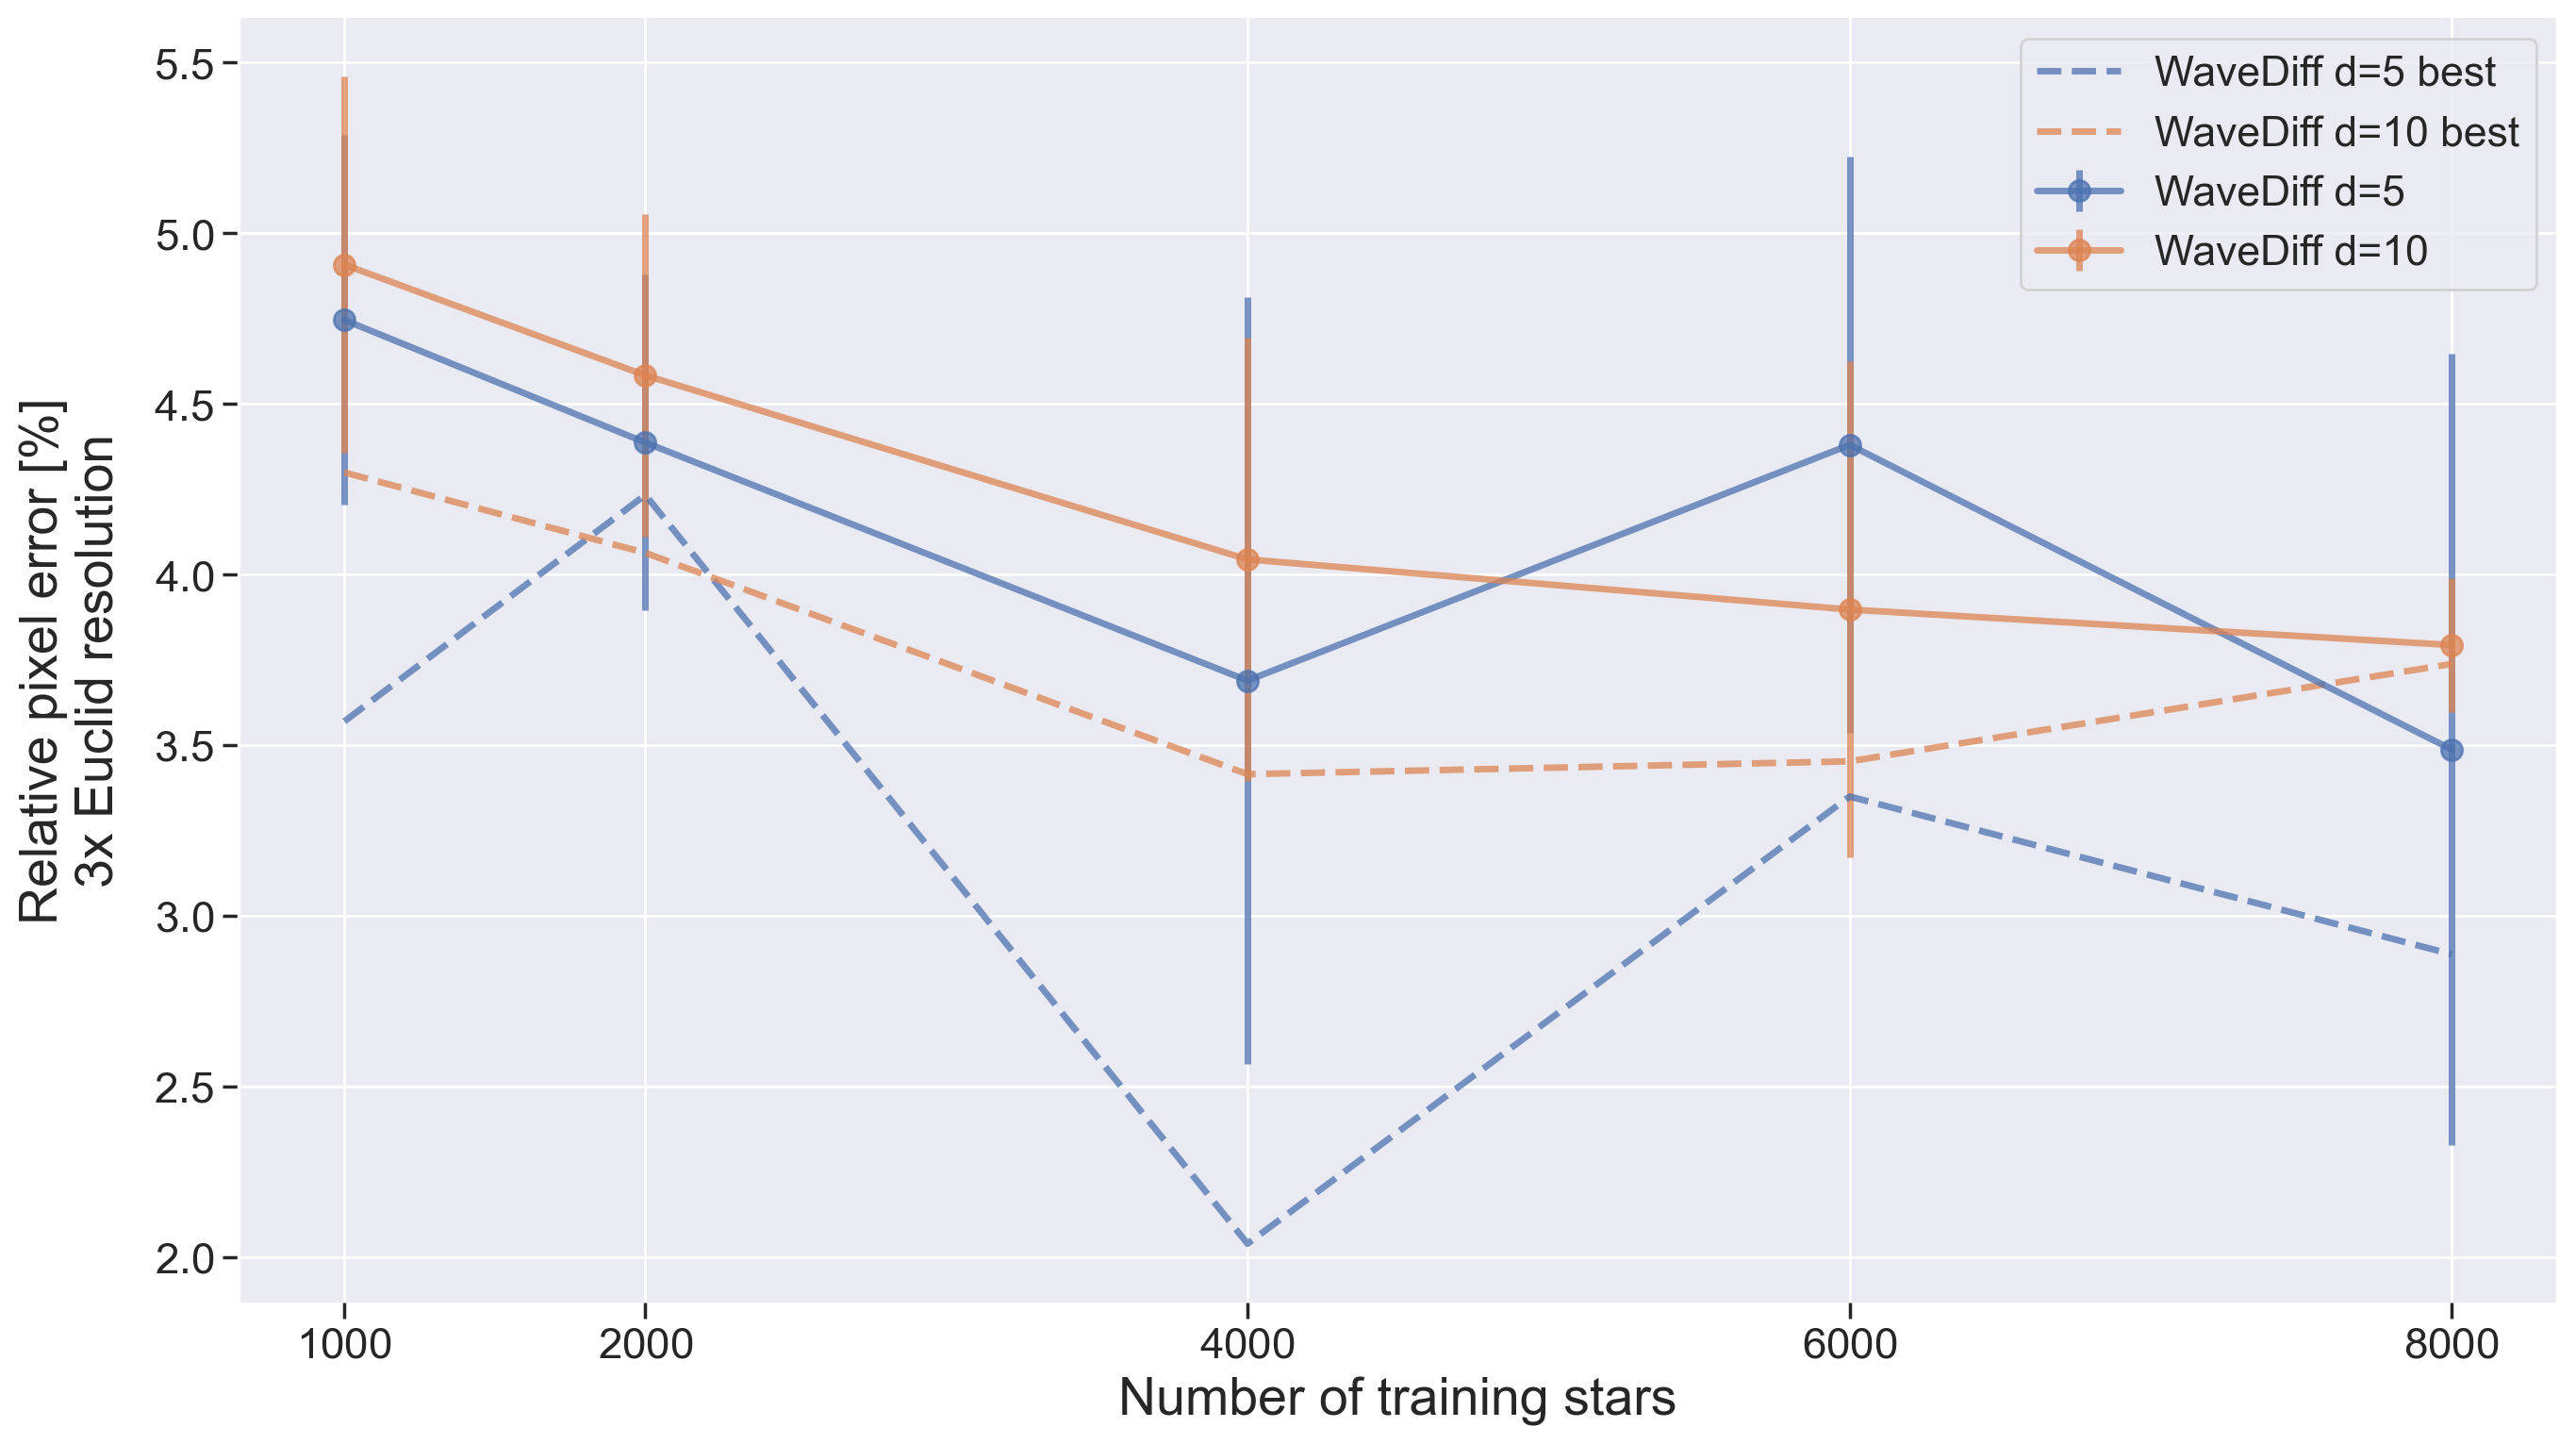

In [158]:

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

# ax1.errorbar(n_stars, metrics_mean[2,:5], metrics_std[2,:5], label='WaveDiff d=5', color=sns.color_palette()[0], **kwargs)
# ax1.errorbar(n_stars, metrics_mean[2,5:], metrics_std[2,5:], label='WaveDiff d=10', color=sns.color_palette()[1], **kwargs)

ax1.errorbar(n_stars, metrics_median[2,:5], metrics_std[2,:5], label='WaveDiff d=5', color=sns.color_palette()[0], **kwargs)
ax1.errorbar(n_stars, metrics_median[2,5:], metrics_std[2,5:], label='WaveDiff d=10', color=sns.color_palette()[1], **kwargs)


ax1.plot(n_stars, metrics_best[2,:5], '--', label='WaveDiff d=5 best', color=sns.color_palette()[0], **kwargs)
ax1.plot(n_stars, metrics_best[2,5:], '--', label='WaveDiff d=10 best', color=sns.color_palette()[1], **kwargs)


ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(n_stars)
# plt.xscale('log')

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Relative pixel error [%]\n3x Euclid resolution', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Number of training stars', fontsize = 20)

# plt.savefig(saving_folder + 'pixel_x3res_more_stars_mean.pdf')
plt.savefig(saving_folder + 'pixel_x3res_more_stars_median.pdf')
plt.show()


# Pixel error @ Euclid resolution


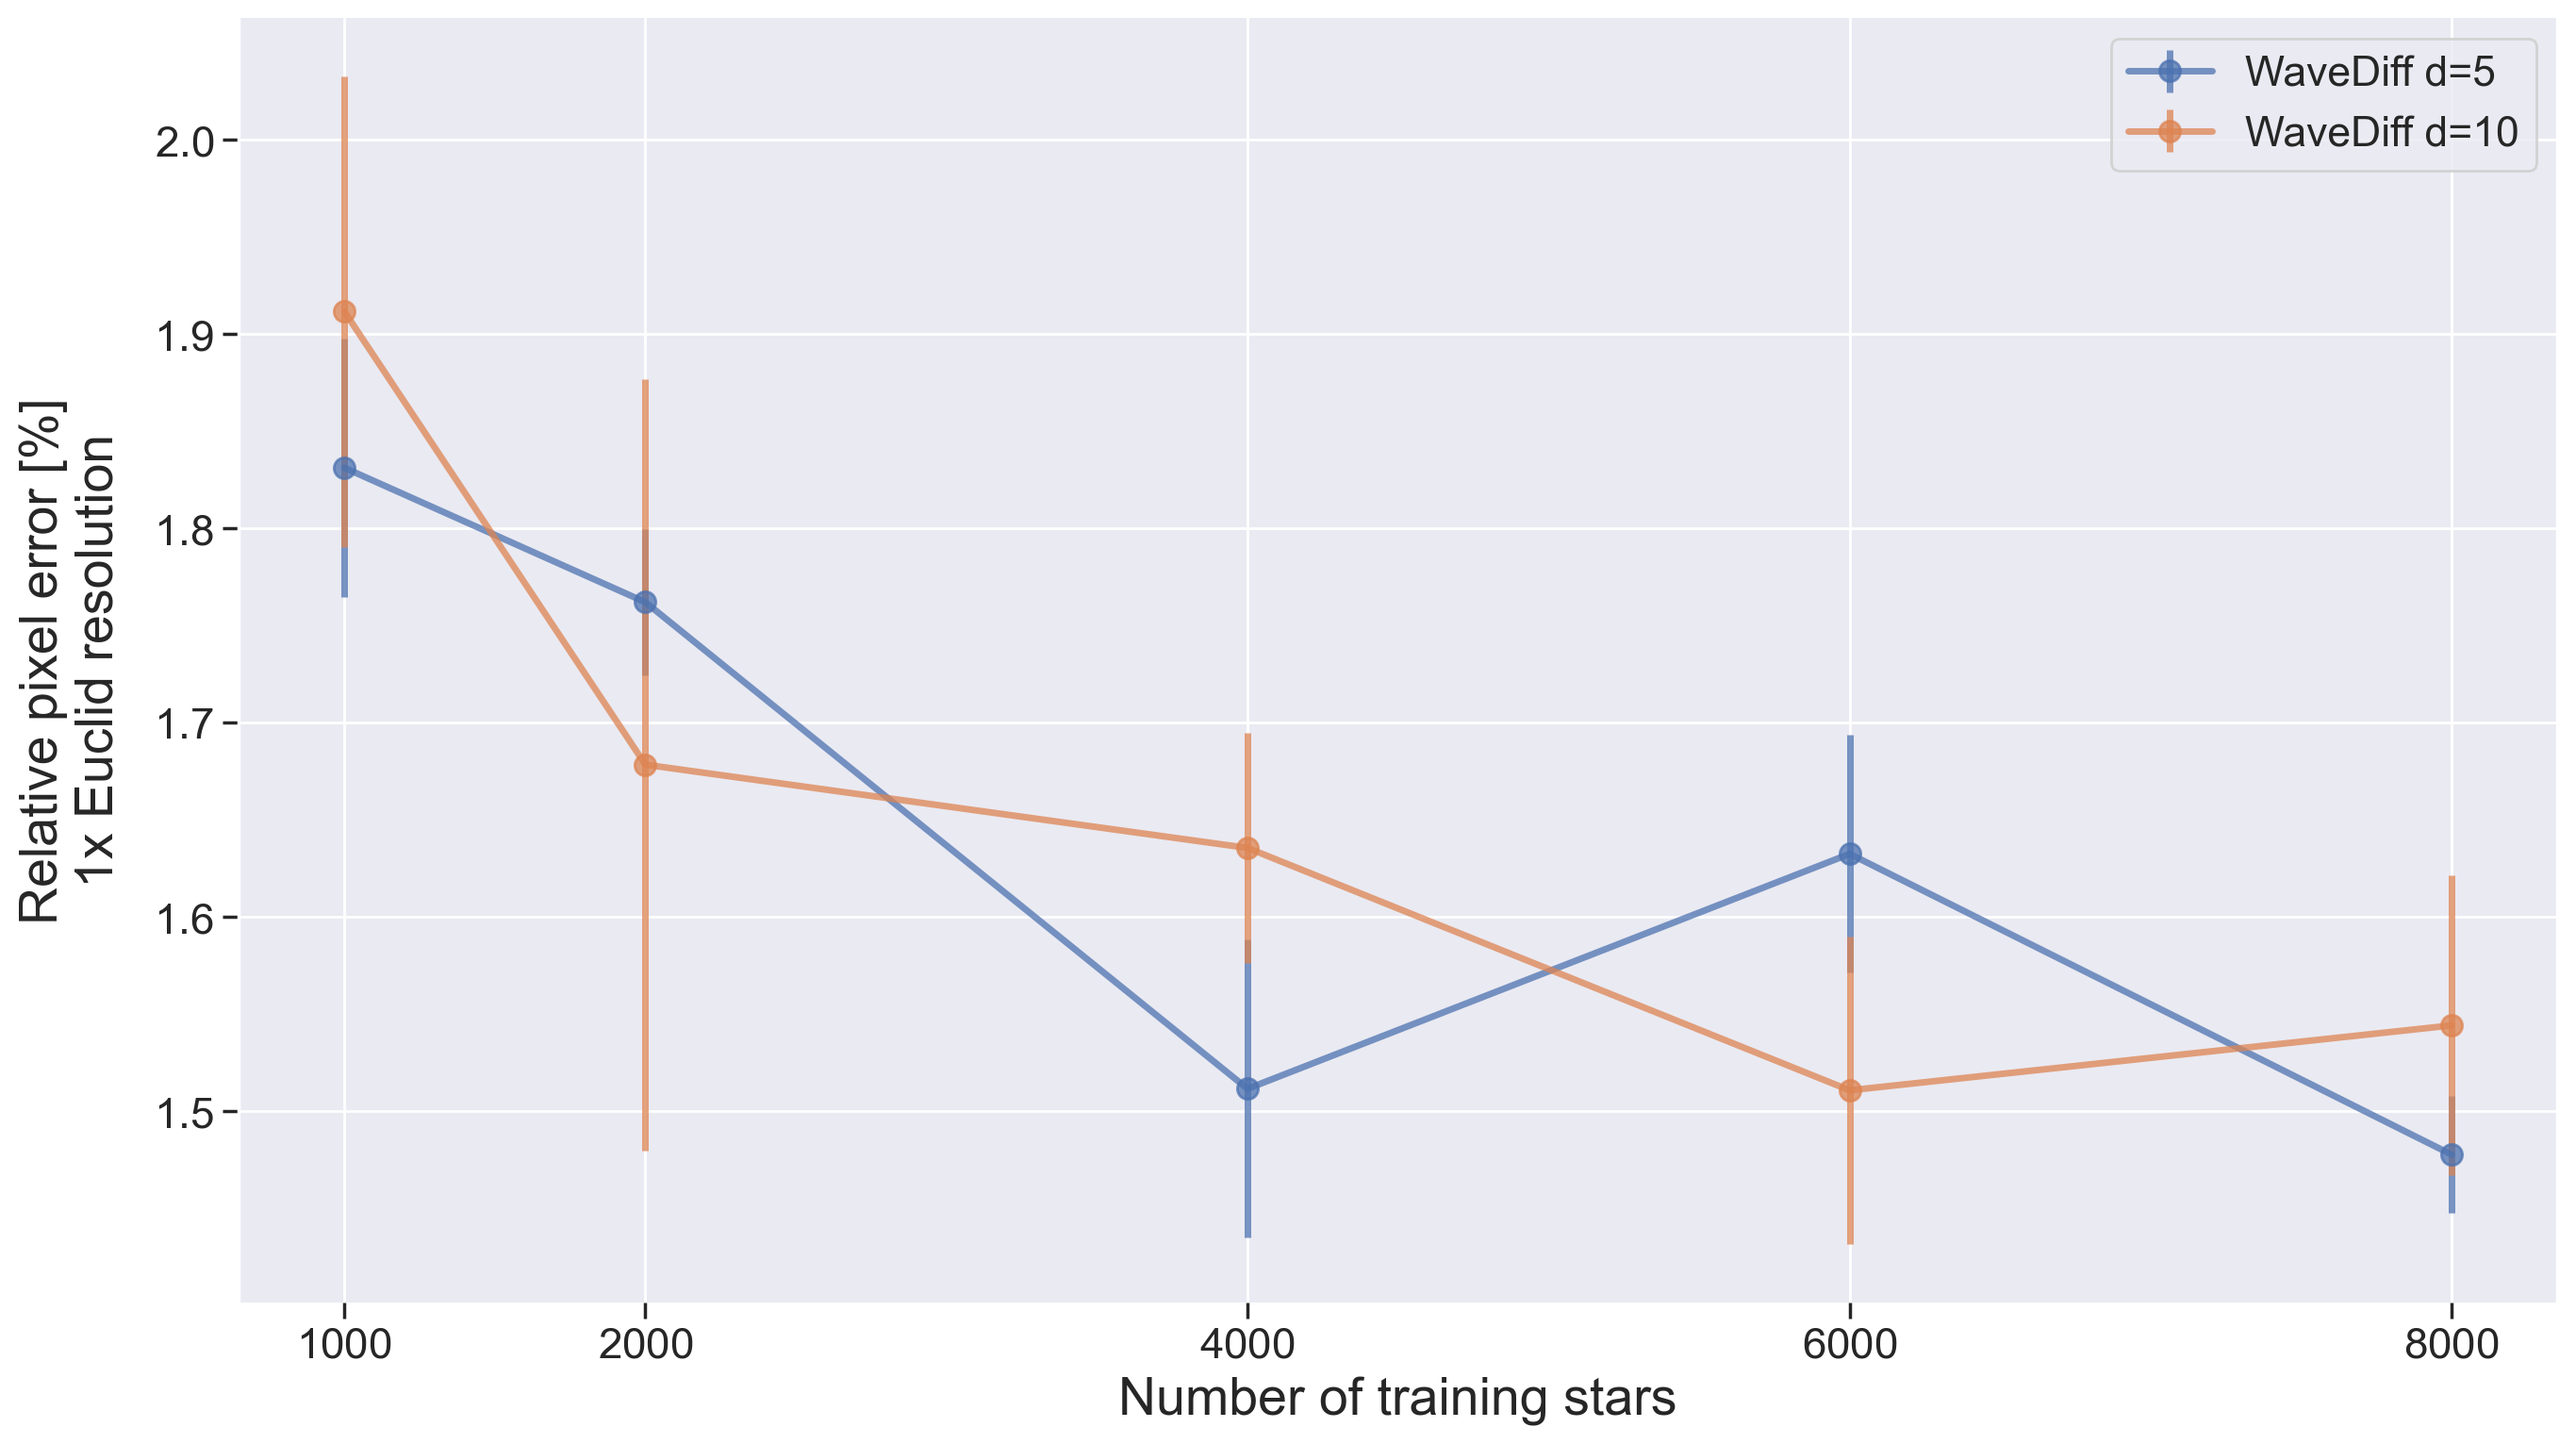

In [10]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

# ax1.errorbar(n_stars, pix_metrics_mean[2,:5], pix_metrics_std[2,:5], label='WaveDiff d=5', color=sns.color_palette()[0], **kwargs)
# ax1.errorbar(n_stars, pix_metrics_mean[2,5:], pix_metrics_std[2,5:], label='WaveDiff d=10', color=sns.color_palette()[1], **kwargs)

ax1.errorbar(n_stars, pix_metrics_median[2,:5], pix_metrics_std[2,:5], label='WaveDiff d=5', **kwargs)
ax1.errorbar(n_stars, pix_metrics_median[2,5:], pix_metrics_std[2,5:], label='WaveDiff d=10', **kwargs)


ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(n_stars)
# plt.xscale('log')

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Relative pixel error [%]\n1x Euclid resolution', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Number of training stars', fontsize = 20)

# plt.savefig(saving_folder + 'pixel_x1res_more_stars_no_best_mean.pdf')
plt.savefig(saving_folder + 'pixel_x1res_more_stars_no_best_median.pdf')
plt.show()


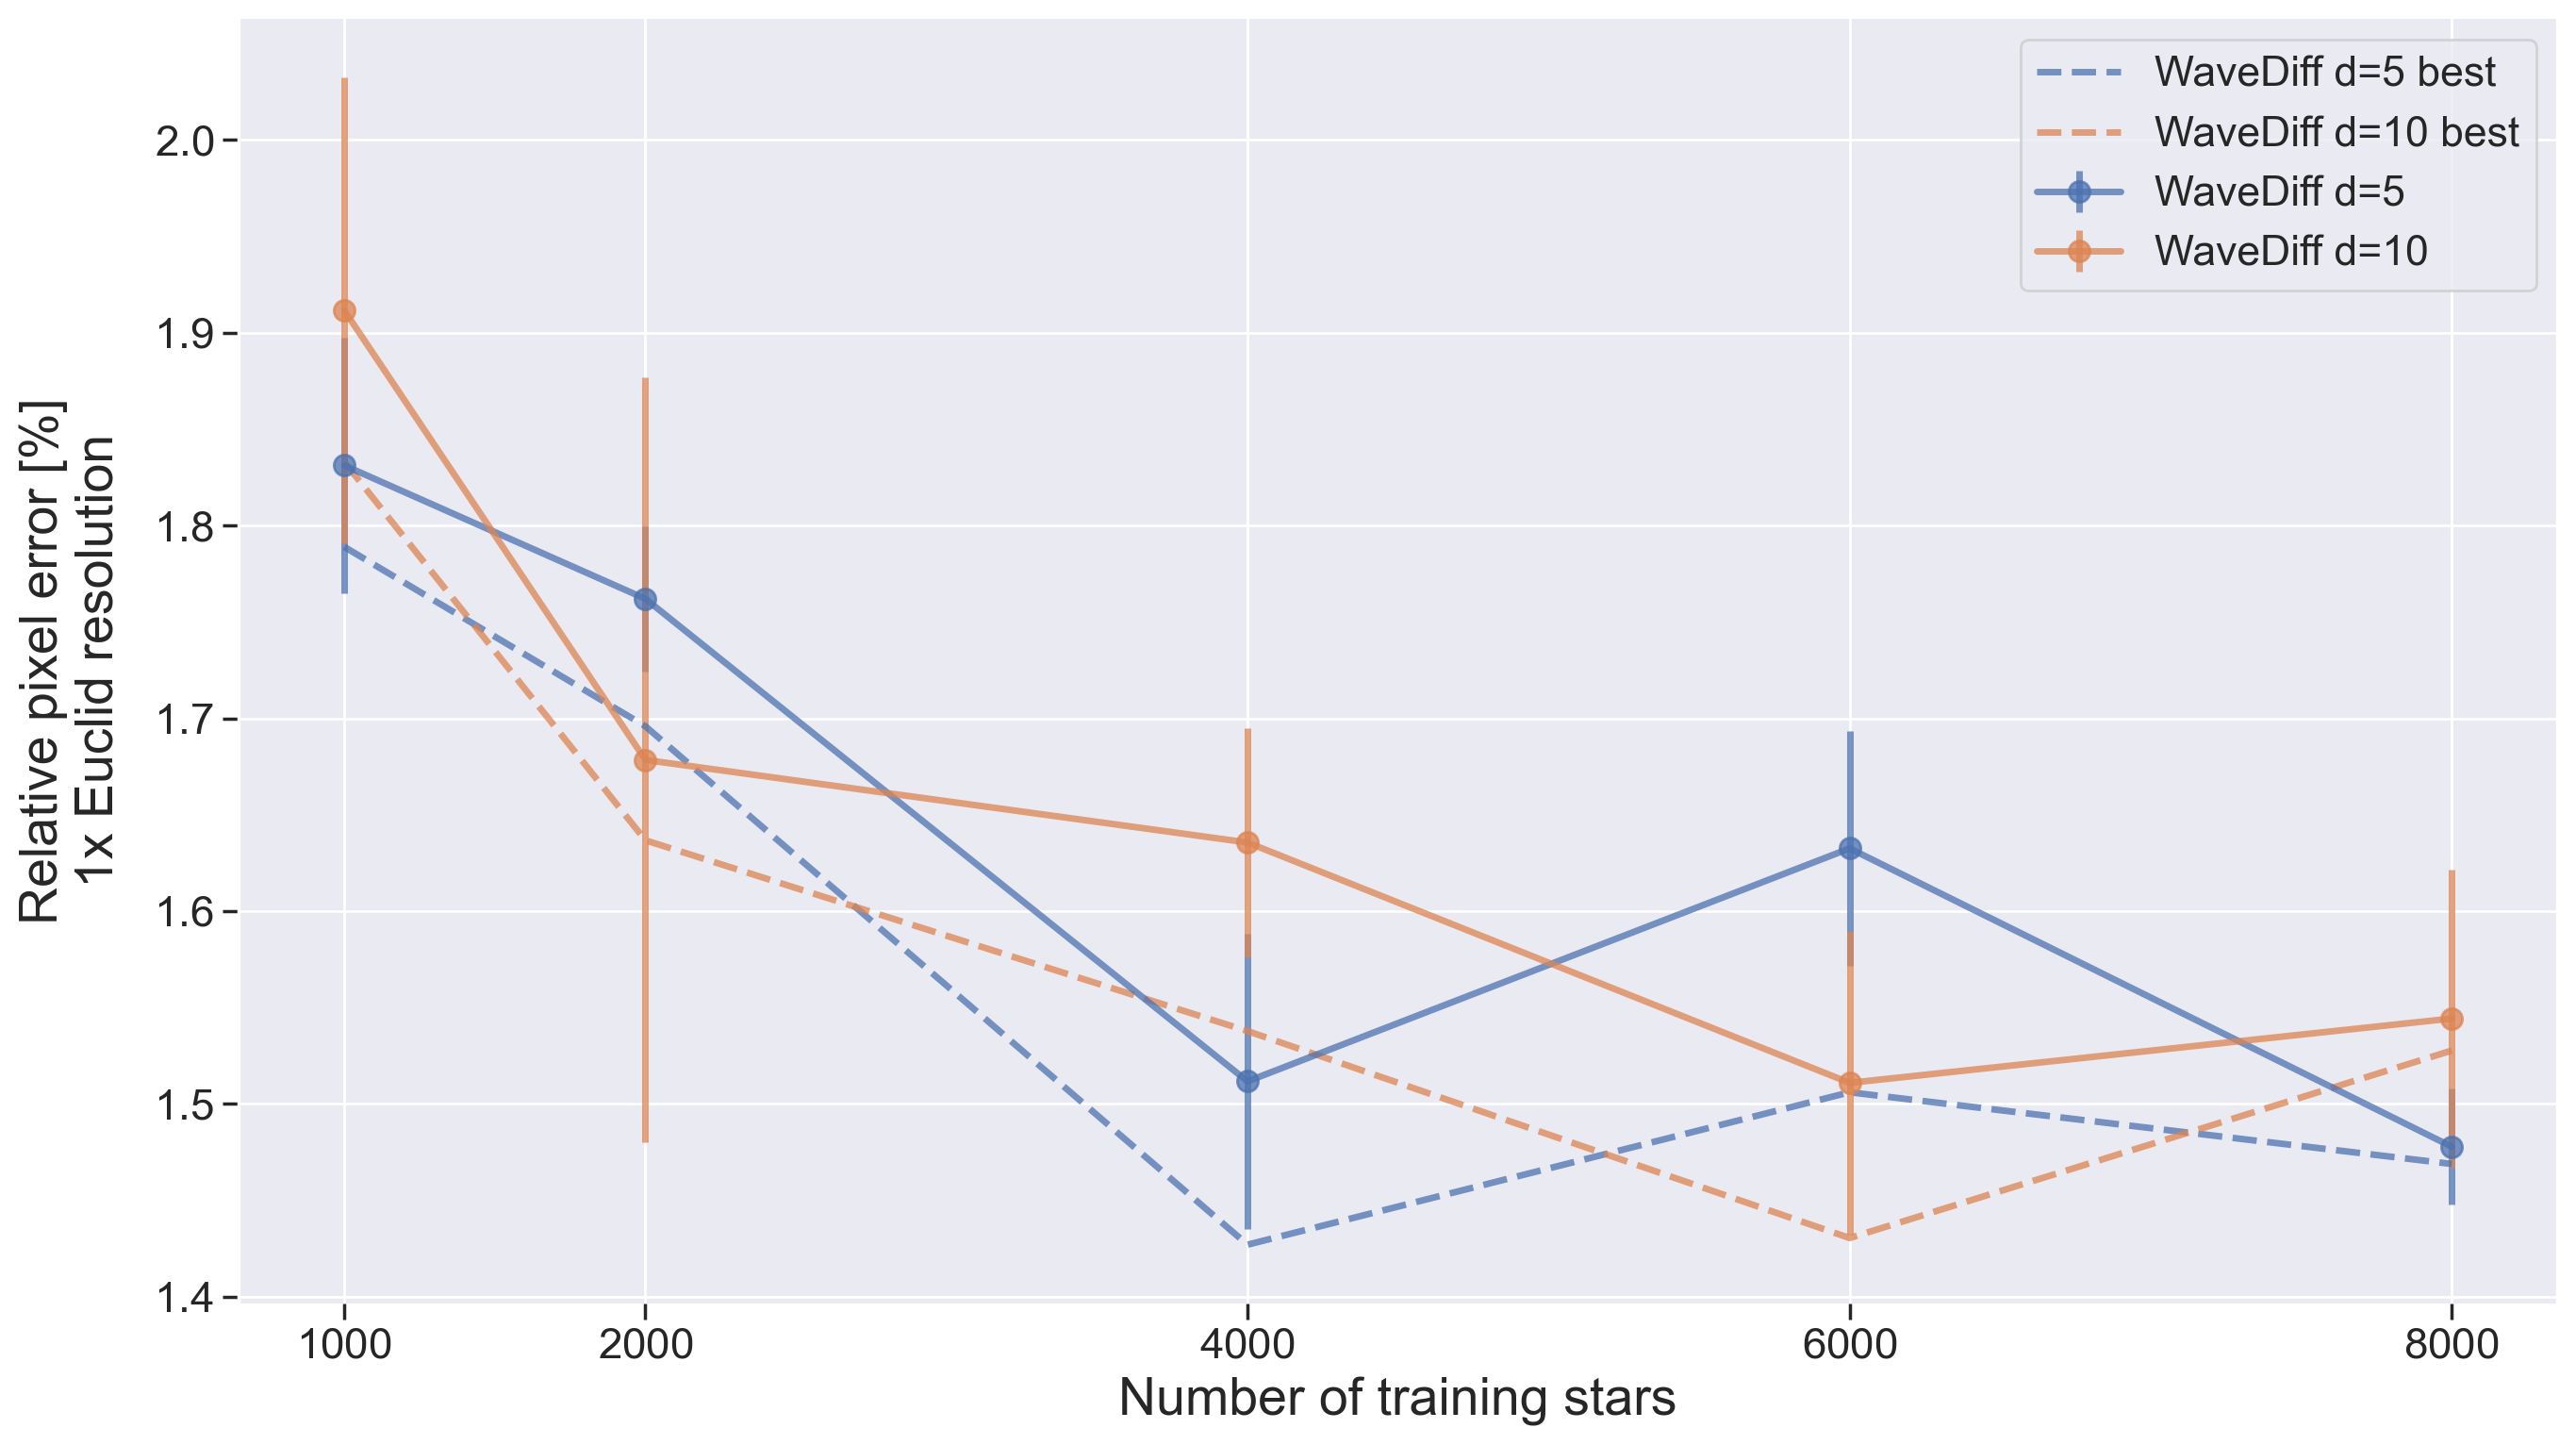

In [156]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

# ax1.errorbar(n_stars, pix_metrics_mean[2,:5], pix_metrics_std[2,:5], label='WaveDiff d=5', color=sns.color_palette()[0], **kwargs)
# ax1.errorbar(n_stars, pix_metrics_mean[2,5:], pix_metrics_std[2,5:], label='WaveDiff d=10', color=sns.color_palette()[1], **kwargs)
ax1.errorbar(n_stars, pix_metrics_median[2,:5], pix_metrics_std[2,:5], label='WaveDiff d=5', **kwargs)
ax1.errorbar(n_stars, pix_metrics_median[2,5:], pix_metrics_std[2,5:], label='WaveDiff d=10', **kwargs)

ax1.plot(n_stars, pix_metrics_best[2,:5], '--', label='WaveDiff d=5 best', color=sns.color_palette()[0], **kwargs)
ax1.plot(n_stars, pix_metrics_best[2,5:], '--', label='WaveDiff d=10 best', color=sns.color_palette()[1], **kwargs)

ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(n_stars)
# plt.xscale('log')

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Relative pixel error [%]\n1x Euclid resolution', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Number of training stars', fontsize = 20)

# plt.savefig(saving_folder + 'pixel_x1res_more_stars_mean.pdf')
plt.savefig(saving_folder + 'pixel_x1res_more_stars_median.pdf')
plt.show()


(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

# WFE 

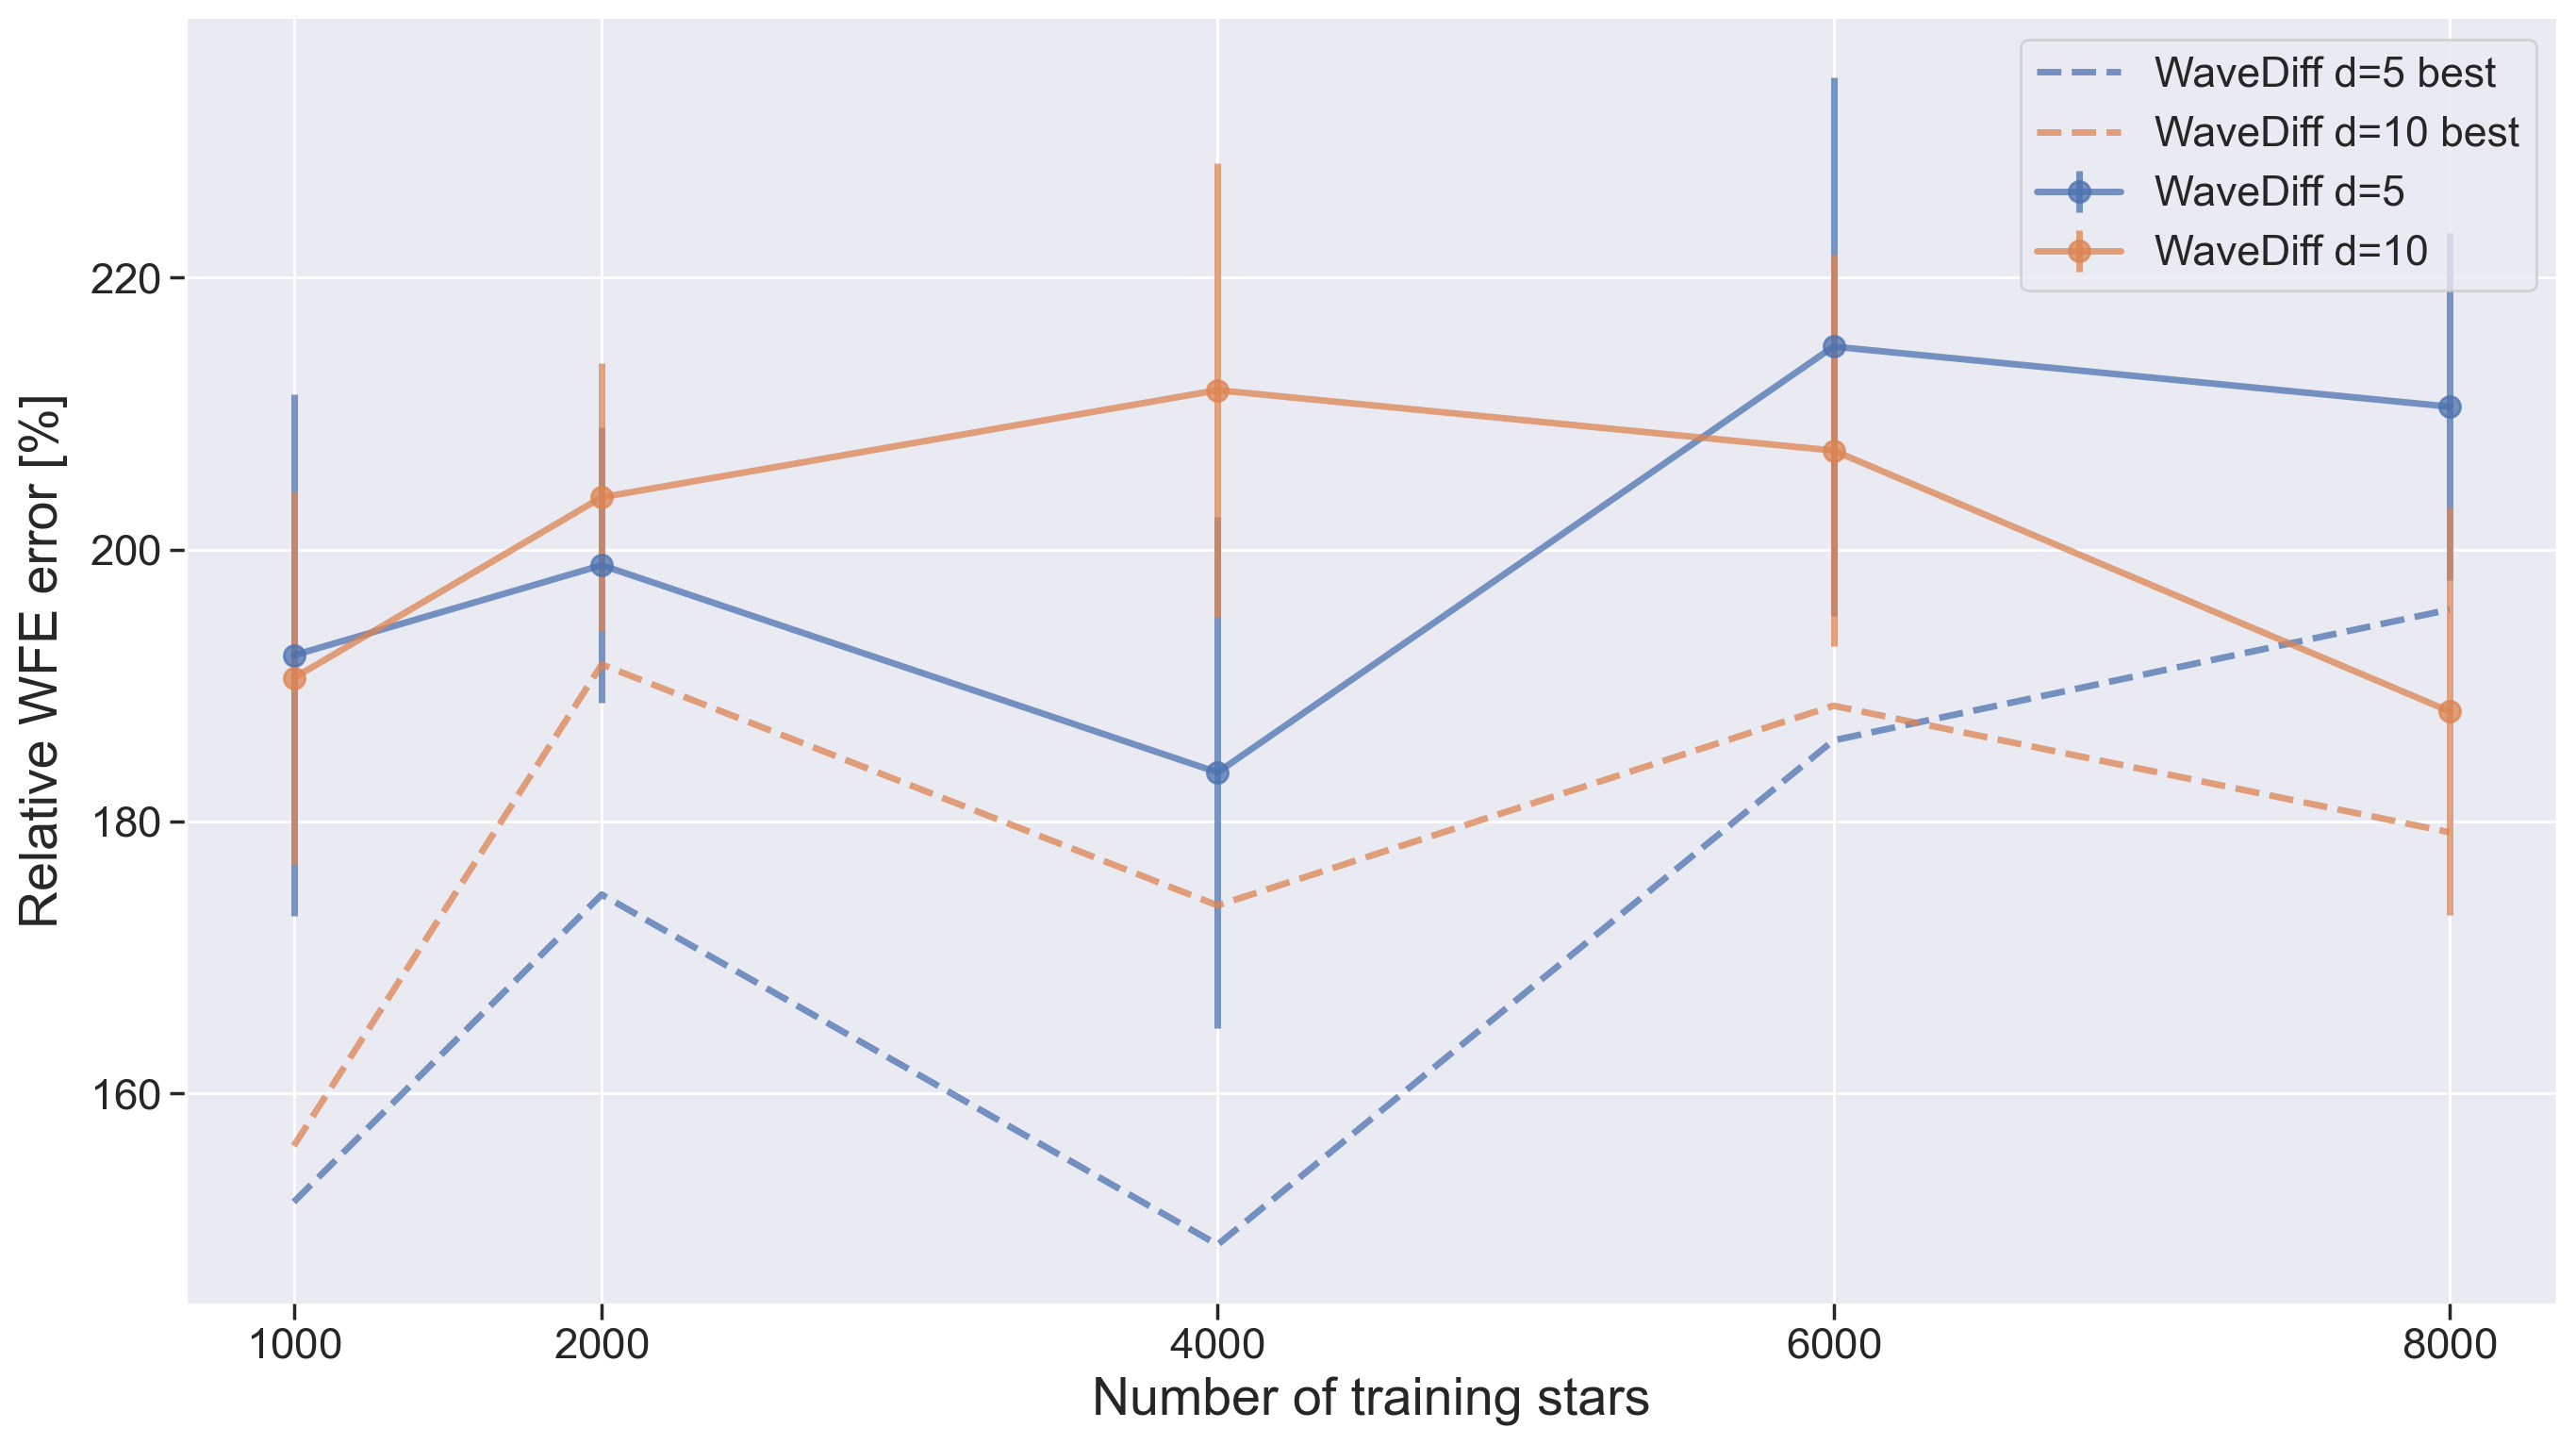

In [12]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

# ax1.errorbar(n_stars, opd_metrics_mean[2,:5], opd_metrics_std[2,:5], label='WaveDiff d=5', color=sns.color_palette()[0], **kwargs)
# ax1.errorbar(n_stars, opd_metrics_mean[2,5:], opd_metrics_std[2,5:], label='WaveDiff d=10', color=sns.color_palette()[1], **kwargs)

ax1.errorbar(n_stars, opd_metrics_median[2,:5], opd_metrics_std[2,:5], label='WaveDiff d=5', color=sns.color_palette()[0], **kwargs)
ax1.errorbar(n_stars, opd_metrics_median[2,5:], opd_metrics_std[2,5:], label='WaveDiff d=10', color=sns.color_palette()[1], **kwargs)



ax1.plot(n_stars, opd_metrics_best[2,:5], '--', label='WaveDiff d=5 best', color=sns.color_palette()[0], **kwargs)
ax1.plot(n_stars, opd_metrics_best[2,5:], '--', label='WaveDiff d=10 best', color=sns.color_palette()[1], **kwargs)


ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(n_stars)
# plt.xscale('log')

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Relative WFE error [%]', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Number of training stars', fontsize = 20)

# plt.savefig(saving_folder + 'OPD_more_stars_mean.pdf')
plt.savefig(saving_folder + 'OPD_more_stars_median.pdf')
plt.show()
